In [148]:
# Import all the necessary libraries
import pandas as pd
import datetime
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import RobustScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score,roc_auc_score,precision_score, recall_score, f1_score,ConfusionMatrixDisplay,classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.inspection import permutation_importance


import warnings 
warnings.filterwarnings("ignore")

In [149]:
cri_compustat_merged = pd.read_pickle("cri_compustat_merged_v8_24months.pkl")
cri_compustat_merged.head()

,CompNo,year,month,StkIndx,STInt,dtdlevel,dtdtrend,liqnonfinlevel,liqnonfintrend,ni2talevel,...,day_sales_outstanding,working_capital_turnover,price_to_earnings,dividend_payout_ratio,retention_ratio,gross_margin_ratio,operating_profit_margin,ebitda_margin,debt_service_coverage_ratio,interest_coverage_ratio
0,22043,2015.0,12,-0.007266,-0.010905,2.050583,0.000000,1.555253,0.000000e+00,-0.074437,...,209.926660,0.000000,-3.750000,-0.0,1.0,-5.251700e+06,-2.189250e+07,-2.185540e+07,-1.607898,-25.591837
1,22043,2016.0,1,-0.040079,-0.010317,1.907466,-0.143118,1.555253,-2.220446e-16,-0.074437,...,215.036863,-0.645608,-2.333333,-0.0,1.0,-3.784182e+02,-8.568365e+02,-8.246649e+02,-149041.103448,-297211.000000
2,22043,2016.0,2,-0.081412,-0.010297,1.735881,-0.343170,1.555253,0.000000e+00,-0.074437,...,215.036863,-0.645608,-2.333333,-0.0,1.0,-3.784182e+02,-8.568365e+02,-8.246649e+02,-149041.103448,-297211.000000
3,22043,2016.0,3,-0.003930,-0.010763,1.574717,-0.483492,1.460546,-3.788296e-01,-0.077557,...,216.622596,0.000000,-3.230769,-0.0,1.0,-5.251700e+06,-2.189250e+07,-2.185540e+07,-1.315689,-19.537118
4,22043,2016.0,4,-0.019668,-0.010722,1.463769,-0.443790,1.397408,-3.156913e-01,-0.079636,...,216.622596,0.000000,-3.230769,-0.0,1.0,-5.251700e+06,-2.189250e+07,-2.185540e+07,-1.315689,-19.537118


In [150]:
us = pd.read_csv("US.csv", skiprows=3)
us.rename(columns={'Company_number':'CompNo'}, inplace=True)
us = us.merge(cri_compustat_merged, on=['CompNo','year','month'], how='inner')

#refactor
cols = list(us.columns)

us.sort_values(by='EventDate', inplace=True)
date2022 = datetime.datetime(2022, 1, 1)
date2020 = datetime.datetime(2020,1,1)
train_df_us = us[us["EventDate"] < date2020]
validation_df_us = us[(us["EventDate"] >= date2020) & (us["EventDate"] < date2022)]
test_df_us = us[us["EventDate"] >= date2022]

train_df_us.drop(["CompNo", "year", "month", "day_x","day_y", "date"], axis=1, inplace=True)
validation_df_us.drop(["CompNo", "year", "month", "day_x","day_y", "date"], axis=1, inplace=True)
test_df_us.drop(["CompNo", "year", "month", "day_x","day_y", "date"], axis=1, inplace=True)

KeyError: "['day_x', 'day_y', 'date'] not found in axis"

In [84]:
x_train_us = train_df_us.drop('Default', axis=1)
y_train_us = train_df_us['Default']
x_validation_us = validation_df_us.drop('Default', axis=1)
y_validation_us = validation_df_us['Default']
x_test_us = test_df_us.drop('Default', axis=1)
y_test_us = test_df_us["Default"]

In [85]:
y_pred_us = x_test_us['12_month']
y_pred_binary_us = np.round(y_pred_us)

Accuracy: 0.9950775517785827
Recall: 0.0
Precision: 0.0
F1 Score: 0.0
AUC: 0.9665332567572419


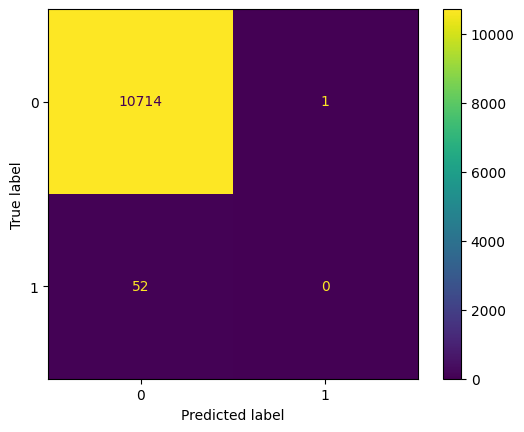

In [86]:
accuracy = accuracy_score(y_test_us, y_pred_binary_us)
recall = recall_score(y_test_us, y_pred_binary_us)
precision = precision_score(y_test_us, y_pred_binary_us)
f1 = f1_score(y_test_us, y_pred_binary_us)
auc = roc_auc_score(y_test_us, y_pred_us)
confusion = confusion_matrix(y_test_us, y_pred_binary_us)

print('Accuracy:', accuracy)
print('Recall:', recall)
print('Precision:', precision)
print('F1 Score:', f1)
print('AUC:', auc)


ConfusionMatrixDisplay(confusion).plot()

In [51]:
us.isna().sum()

CompNo                         0
year                           0
month                          0
day_x                          0
1_month                        0
3_month                        0
6_month                        0
12_month                       0
24_month                       0
36_month                       0
60_month                       0
StkIndx                        0
STInt                          0
dtdlevel                       0
dtdtrend                       0
liqnonfinlevel                 0
liqnonfintrend                 0
ni2talevel                     0
ni2tatrend                     0
sizelevel                      0
sizetrend                      0
m2b                            0
sigma                          0
liqfinlevel                    0
lqfintrend                     0
DTDmedianFin                   0
DTDmedianNonFin                0
dummy297fin                    0
Default                        0
day_y                          0
date      

In [117]:
yfinance = pd.read_pickle("yfinance_sortino_MACD_RSI.pkl")
yfinance

,tic,yyyy,mm,Rolling_Sortino,macd,macd_h,macd_s,rsi
0,A,2000,1,NaN,0.000000,0.000000,0.000000,NaN
1,A,2000,2,NaN,1.075967,0.860774,0.215193,100.000000
2,A,2000,3,NaN,3.969328,3.003308,0.966020,100.000000
3,A,2000,4,NaN,4.539882,2.859089,1.680793,65.530596
4,A,2000,5,NaN,4.087595,1.925442,2.162153,55.676209
...,...,...,...,...,...,...,...,...
1832582,ZZZOF,2023,1,-0.027464,-0.612086,0.180779,-0.792866,31.538242
1832583,ZZZOF,2023,2,-0.158575,-0.577128,0.172590,-0.749718,33.238700
1832584,ZZZOF,2023,3,-0.205893,-0.546051,0.162933,-0.708985,32.361822
1832585,ZZZOF,2023,4,-0.458724,-0.514913,0.155257,-0.670170,32.844994


In [120]:
yfinance = yfinance.rename(columns={"yyyy":"year"})
yfinance = yfinance.rename(columns={"mm":"month"})
yfinance

,tic,year,month,Rolling_Sortino,macd,macd_h,macd_s,rsi
0,A,2000,1,NaN,0.000000,0.000000,0.000000,NaN
1,A,2000,2,NaN,1.075967,0.860774,0.215193,100.000000
2,A,2000,3,NaN,3.969328,3.003308,0.966020,100.000000
3,A,2000,4,NaN,4.539882,2.859089,1.680793,65.530596
4,A,2000,5,NaN,4.087595,1.925442,2.162153,55.676209
...,...,...,...,...,...,...,...,...
1832582,ZZZOF,2023,1,-0.027464,-0.612086,0.180779,-0.792866,31.538242
1832583,ZZZOF,2023,2,-0.158575,-0.577128,0.172590,-0.749718,33.238700
1832584,ZZZOF,2023,3,-0.205893,-0.546051,0.162933,-0.708985,32.361822
1832585,ZZZOF,2023,4,-0.458724,-0.514913,0.155257,-0.670170,32.844994


In [121]:
cri_compustat_yfinance = cri_compustat_merged.merge(yfinance, on=['tic','year','month'], how='inner')

In [122]:
cri_compustat_yfinance.shape[0]

615246

In [123]:
cri_compustat_yfinance.isna().sum()

CompNo                             0
year                               0
month                              0
StkIndx                            0
STInt                              0
dtdlevel                           0
dtdtrend                           0
liqnonfinlevel                     0
liqnonfintrend                     0
ni2talevel                         0
ni2tatrend                         0
sizelevel                          0
sizetrend                          0
m2b                                0
sigma                              0
liqfinlevel                        0
lqfintrend                         0
DTDmedianFin                       0
DTDmedianNonFin                    0
dummy297fin                        0
Default                            0
day                                0
date                               0
StartDate                          0
EventDate                          0
Duration                           0
gvkey                              0
t

In [124]:
cri_compustat_yfinance.dropna(inplace=True)

In [145]:
cri_compustat_yfinance.to_pickle("cri_compustat_v8_yfinance.pkl")

In [125]:
cri_compustat_merged = cri_compustat_yfinance 

In [151]:
cri_compustat_merged

,CompNo,year,month,StkIndx,STInt,dtdlevel,dtdtrend,liqnonfinlevel,liqnonfintrend,ni2talevel,...,day_sales_outstanding,working_capital_turnover,price_to_earnings,dividend_payout_ratio,retention_ratio,gross_margin_ratio,operating_profit_margin,ebitda_margin,debt_service_coverage_ratio,interest_coverage_ratio
0,22043,2015.0,12,-0.007266,-0.010905,2.050583,0.000000,1.555253,0.000000e+00,-0.074437,...,209.926660,0.000000,-3.750000,-0.000000,1.000000,-5.251700e+06,-2.189250e+07,-2.185540e+07,-1.607898,-25.591837
1,22043,2016.0,1,-0.040079,-0.010317,1.907466,-0.143118,1.555253,-2.220446e-16,-0.074437,...,215.036863,-0.645608,-2.333333,-0.000000,1.000000,-3.784182e+02,-8.568365e+02,-8.246649e+02,-149041.103448,-297211.000000
2,22043,2016.0,2,-0.081412,-0.010297,1.735881,-0.343170,1.555253,0.000000e+00,-0.074437,...,215.036863,-0.645608,-2.333333,-0.000000,1.000000,-3.784182e+02,-8.568365e+02,-8.246649e+02,-149041.103448,-297211.000000
3,22043,2016.0,3,-0.003930,-0.010763,1.574717,-0.483492,1.460546,-3.788296e-01,-0.077557,...,216.622596,0.000000,-3.230769,-0.000000,1.000000,-5.251700e+06,-2.189250e+07,-2.185540e+07,-1.315689,-19.537118
4,22043,2016.0,4,-0.019668,-0.010722,1.463769,-0.443790,1.397408,-3.156913e-01,-0.079636,...,216.622596,0.000000,-3.230769,-0.000000,1.000000,-5.251700e+06,-2.189250e+07,-2.185540e+07,-1.315689,-19.537118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1179409,93052,2013.0,9,-0.009545,-0.007274,4.892001,1.212125,-0.402310,-8.963039e-03,-0.001001,...,0.000000,-2.837200,64.300000,1.500000,-0.500000,6.804920e+01,3.344428e+01,6.252388e+01,0.100118,15.255908
1179410,93052,2013.0,10,0.030578,-0.007554,4.870839,0.330139,-0.423252,1.197909e-02,-0.001054,...,0.000000,-2.837200,64.300000,1.500000,-0.500000,6.804920e+01,3.344428e+01,6.252388e+01,0.100118,15.255908
1179411,93052,2013.0,11,0.026269,-0.007414,4.842565,0.113506,-0.457056,-1.823057e-01,-0.000853,...,0.000000,-2.837200,64.300000,1.500000,-0.500000,6.804920e+01,3.344428e+01,6.252388e+01,0.100118,15.255908
1179412,93052,2013.0,12,0.023256,-0.007519,4.835230,-0.059513,-0.490860,-1.485018e-01,-0.000653,...,0.000000,-1.877653,96.200000,3.000000,-2.000000,6.061403e+01,1.853357e+01,5.433714e+01,0.046131,12.713643


In [152]:
#refactor
cols = list(cri_compustat_merged.columns)

cri_compustat_merged.sort_values(by='EventDate', inplace=True)
date2022 = datetime.datetime(2022, 1, 1)
date2020 = datetime.datetime(2020,1,1)
train_df = cri_compustat_merged[cri_compustat_merged["EventDate"] < date2020]
validation_df = cri_compustat_merged[(cri_compustat_merged["EventDate"] >= date2020) & (cri_compustat_merged["EventDate"] < date2022)]
test_df = cri_compustat_merged[cri_compustat_merged["EventDate"] >= date2022]

In [153]:
len(cri_compustat_merged[cri_compustat_merged['Default'] == 1])/len(cri_compustat_merged)*100

1.627503149869342

In [154]:
len(validation_df[validation_df['Default'] == 1])/len(validation_df) *100

0.8885229592274311

In [155]:
len(test_df[test_df['Default'] == 1])/len(test_df) *100

0.5035990913320744

In [156]:
cri_compustat_merged[cri_compustat_merged['Default'] == 1]

,CompNo,year,month,StkIndx,STInt,dtdlevel,dtdtrend,liqnonfinlevel,liqnonfintrend,ni2talevel,...,day_sales_outstanding,working_capital_turnover,price_to_earnings,dividend_payout_ratio,retention_ratio,gross_margin_ratio,operating_profit_margin,ebitda_margin,debt_service_coverage_ratio,interest_coverage_ratio
357341,31460,2000.0,1,0.089239,0.011089,1.019801,0.519698,0.383521,0.209476,0.002826,...,267.973838,1.125618,-19.444444,-0.0,1.0,36.882547,-6.706915e+01,-6.566045e+01,-1.710686,-4.595745
308811,30660,2000.0,1,0.089239,0.011089,1.719457,1.383901,0.219186,-0.456913,-0.175112,...,4103.723784,0.004312,-2.712264,-0.0,1.0,-1927.642617,-6.013591e+03,-5.511619e+03,-0.583865,-258.923706
44887,27373,2000.0,1,0.089239,0.011089,-0.370956,-0.304608,0.686528,0.481389,-0.004129,...,238.103165,9.302908,-0.017308,-0.0,1.0,17.893421,-7.898615e+01,-6.943055e+01,-0.728284,0.745747
390428,32034,2000.0,1,0.089239,0.011089,1.808985,-0.524587,0.405879,0.002600,0.013232,...,177.766204,-1.206565,-6.250000,-0.0,1.0,6.113648,-1.006215e+02,-9.734906e+01,-0.397704,-0.771802
28813,27240,2000.0,1,0.089239,0.011089,1.608767,-0.579390,0.546160,0.131284,-0.001938,...,300.709446,2.072832,-0.714286,-0.0,1.0,6.380575,-1.007847e+02,-9.646779e+01,-0.394548,-1.173697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298004,30473,2023.0,3,-0.092950,0.007115,-0.761189,-0.147672,1.021671,-0.218530,-0.034514,...,420.690530,-0.483450,-0.176829,-0.0,1.0,27.335511,-7.955085e+01,-7.106463e+01,-0.100127,-0.365241
896823,46481,2023.0,3,-0.092950,0.007115,0.622700,-0.098017,1.692032,0.166245,-0.036078,...,0.000000,0.000000,-0.868966,-0.0,1.0,-324.793063,-2.189250e+07,-2.185540e+07,-1.577718,-223.529412
40977,27346,2023.0,3,-0.092950,0.007115,-1.113511,0.000000,0.098426,0.000000,-0.016226,...,262.553615,7.346535,-0.857143,-0.0,1.0,28.008907,-6.484238e+01,-6.139693e+01,-0.208368,0.744811
40978,27346,2023.0,4,-0.027527,0.008456,-1.113511,-0.055722,0.098426,0.000000,-0.016226,...,262.553615,7.346535,-0.857143,-0.0,1.0,28.008907,-6.484238e+01,-6.139693e+01,-0.208368,0.744811


In [157]:
cri_compustat_merged.columns

Index(['CompNo', 'year', 'month', 'StkIndx', 'STInt', 'dtdlevel', 'dtdtrend',
       'liqnonfinlevel', 'liqnonfintrend', 'ni2talevel', 'ni2tatrend',
       'sizelevel', 'sizetrend', 'm2b', 'sigma', 'liqfinlevel', 'lqfintrend',
       'DTDmedianFin', 'DTDmedianNonFin', 'dummy297fin', 'EventDate',
       'Default', 'StartDate', 'Duration', 'gvkey', 'tic', 'current_ratio',
       'quick_ratio', 'cash_ratio', 'net_working_capital', 'debt_ratio',
       'debt_to_equity_ratio', 'equity_ratio', 'cashflow_to_debt_ratio',
       'net_profit_margin', 'return_on_assets', 'asset_turnover',
       'inventory_turnover', 'days_in_inventory', 'receivables_turnover',
       'day_sales_outstanding', 'working_capital_turnover',
       'price_to_earnings', 'dividend_payout_ratio', 'retention_ratio',
       'gross_margin_ratio', 'operating_profit_margin', 'ebitda_margin',
       'debt_service_coverage_ratio', 'interest_coverage_ratio'],
      dtype='object')

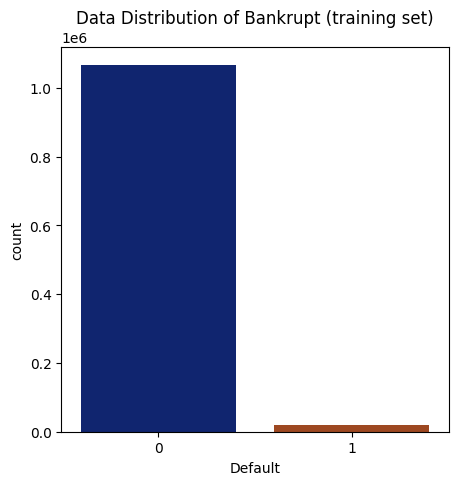

Imbalance Ratio is:57.64802898393987
 % of default is :0.017050871398829777


In [158]:
plt.figure(figsize=(5,5))
sns.countplot(x=train_df["Default"], palette="dark")
plt.title("Data Distribution of Bankrupt (training set)")
plt.show()
majority_class_samples=train_df["Default"].loc[train_df["Default"]==0]
minority_class_samples=train_df["Default"].loc[train_df["Default"]==1]
Imbalance_Ratio= len(majority_class_samples)/len(minority_class_samples)
percentage = len(minority_class_samples)/(len(minority_class_samples)+len(majority_class_samples))
print(f"Imbalance Ratio is:{Imbalance_Ratio}")
print(f" % of default is :{percentage}") 

In [160]:
# drop unecessary columns
train_df.drop(["CompNo", "year", "month",], axis=1, inplace=True)
validation_df.drop(["CompNo", "year", "month"], axis=1, inplace=True)
test_df.drop(["CompNo", "year", "month"], axis=1, inplace=True)

In [161]:
x_train = train_df.drop('Default', axis=1)
y_train = train_df['Default']
x_validation = validation_df.drop('Default', axis=1)
y_validation = validation_df['Default']
x_test = test_df.drop('Default', axis=1)
y_test = test_df["Default"]

In [162]:
def get_num_cat_columns(dataframe):
    categorical_cols=dataframe.select_dtypes(include="object").columns
    numerical_cols=dataframe.select_dtypes(exclude="object").columns
    
    return categorical_cols, numerical_cols

In [163]:
categorical_cols, numerical_cols= get_num_cat_columns(x_train)

In [164]:
def Winsorization_Method(columns, x_train, y_train , a, b):
    outliers=[]

    for col in columns:
        q1= np.percentile(x_train[col], a)
        q2= np.percentile(x_train[col],b)
        
        for pos in range(len(x_train)):
            if x_train[col].iloc[pos]>q2 or x_train[col].iloc[pos]<q1:
                outliers.append(pos) 
                
    outliers= set(outliers)                   # remove the duplicates from the outliers
    outliers= list(outliers)
    
    ratio= round(len(outliers)/len(x_train)*100, 2)                       # Ratio of outliers
    x_train.drop(x_train.index[outliers], inplace=True)    # remove the outliers from the training dataset
    y_train.drop(y_train.index[outliers], inplace=True)
    
    
    
    return ratio, x_train, y_train

In [165]:
ratio, x_train, y_train= Winsorization_Method(numerical_cols, x_train, y_train,a=0.3,b=99.7)
print(f"Ratio of Outliers Detected in the dataset:{ratio}")

Ratio of Outliers Detected in the dataset:14.33


In [166]:
# shape of data after removing the outliers in the training data
x_train.shape,x_test.shape,x_validation.shape ,y_train.shape, y_test.shape, y_validation.shape

((929128, 46), (36537, 46), (58299, 46), (929128,), (36537,), (58299,))

In [167]:
def to_csv(path):
    x_train.to_csv(path + "X_train_winsorized.csv", index=False)
    x_test.to_csv(path + "X_test.csv", index=False)
    x_validation.to_csv(path + "X_validation.csv", index=False)
    y_train.to_csv(path + "Y_train_winsorized.csv", index=False)
    y_test.to_csv(path + "Y_test.csv", index=False)
    y_validation.to_csv(path + "Y_validation.csv", index=False)

to_csv("../Dataset/24months/")